Đoàn Nhật Hưng

23520556

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D,
    Dense, Dropout, BatchNormalization, Activation
)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!nvidia-smi

Thu Nov  6 06:12:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Load dữ liệu
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Hiển thị kích thước
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


In [6]:
# Chuẩn hóa (normalize) và reshape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Thêm chiều channel
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # (10000, 28, 28, 1)

In [8]:
# Chuyển labels sang one-hot
num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)

In [9]:
print("After reshape:", X_train.shape, y_train_cat.shape)

After reshape: (60000, 28, 28, 1) (60000, 10)


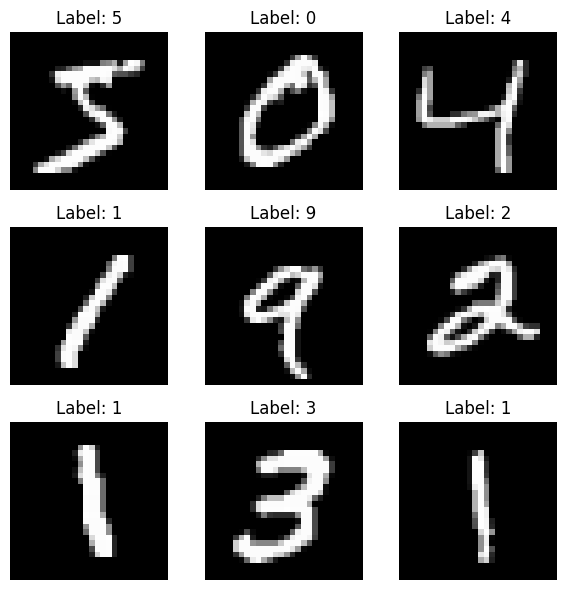

In [10]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()

In [11]:
lenet = Sequential([
    # Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1))
    # - Lớp conv đầu LeNet với 6 filter 5x5; padding='same' giữ nguyên H,W
    Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28,1)),

    # AveragePooling2D(pool_size=(2,2), strides=2)
    # - Trung bình hóa trong ô 2x2 và giảm kích thước (giống pooling nhưng lấy mean)
    AveragePooling2D(pool_size=(2,2), strides=2),

    # Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu')
    Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=2),

    # Flatten -> Dense(120) -> Dense(84) -> Dense(10)
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, Recall

optimizer = optimizers.Adam(learning_rate=0.01)

lenet.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',   # nếu y là one-hot, dùng categorical_crossentropy
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


In [14]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=42)

In [15]:
history = lenet.fit(X_tr, y_tr, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8702 - loss: 0.3888 - precision: 0.9320 - recall: 0.8361 - val_accuracy: 0.9758 - val_loss: 0.0821 - val_precision: 0.9792 - val_recall: 0.9732
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0627 - precision: 0.9831 - recall: 0.9787 - val_accuracy: 0.9845 - val_loss: 0.0524 - val_precision: 0.9863 - val_recall: 0.9823
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9850 - loss: 0.0497 - precision: 0.9868 - recall: 0.9838 - val_accuracy: 0.9813 - val_loss: 0.0524 - val_precision: 0.9843 - val_recall: 0.9798
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0397 - precision: 0.9896 - recall: 0.9870 - val_accuracy: 0.9880 - val_loss: 0.0454 - val_precision: 0.9896 - val_recall: 0.9867
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0344 - precision: 0.9914 - recall: 0.9888 - val_accuracy: 0.9862 - val_loss: 0.051

In [16]:
import numpy as np
from sklearn.metrics import f1_score

# Tính F1 macro sau khi train xong
y_pred = lenet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test # y_test is already the class indices

f1_macro = f1_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
print(f"F1-score (macro) trên tập test: {f1_macro:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
F1-score (macro) trên tập test: 0.9886


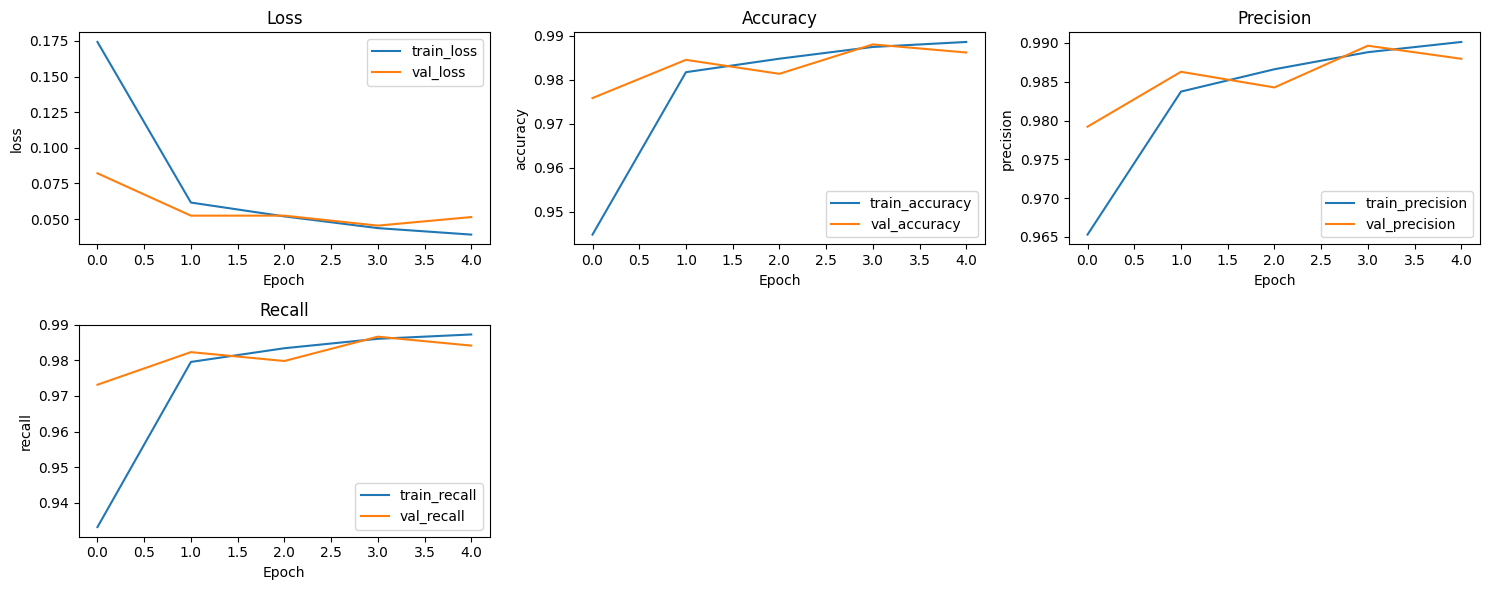

In [17]:
import matplotlib.pyplot as plt

# Các metric bạn đã khai báo khi compile model
metrics = ['loss', 'accuracy', 'precision', 'recall']

plt.figure(figsize=(15, 6))

for i, m in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.plot(history.history[m], label=f"train_{m}")
    plt.plot(history.history[f"val_{m}"], label=f"val_{m}")
    plt.title(m.capitalize())
    plt.xlabel('Epoch')
    plt.ylabel(m)
    plt.legend()

plt.tight_layout()
plt.show()

##BÀI 2:Xây dựng mô hình GoogLeNet. Huấn luyện và đánh giá mô hình GoogLeNet trên 4 độ đo precision, recall và F1 (sử dụng Adam làm optimizer).


In [3]:
import os, cv2, torch
from torch.utils.data import Dataset, DataLoader, random_split
from collections import Counter
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm.auto import tqdm

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from tqdm.auto import tqdm
import os
from collections import Counter

class ViNaFood21Dataset(Dataset):
    def __init__(self, path, is_train=True, img_size=(224, 224)):
        super().__init__()
        self.path = path
        self.is_train = is_train
        self.label2idx = {}
        self.idx2label = {}

        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])

        if self.is_train:
            self.transform = transforms.Compose([
                transforms.Resize(img_size),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                normalize,
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize(img_size),
                transforms.ToTensor(),
                normalize,
            ])

        self.image_paths, self.labels = self._scan_image_paths()
        self._print_class_distribution()

    def _scan_image_paths(self):
        image_paths, labels = [], []
        label_id = 0
        allowed_extensions = ('.jpg', '.jpeg', '.png')

        print(f"Scanning image paths from: {self.path}")
        for folder in sorted(os.listdir(self.path)):
            folder_path = os.path.join(self.path, folder)
            if not os.path.isdir(folder_path):
                continue

            if folder not in self.label2idx:
                self.label2idx[folder] = label_id
                self.idx2label[label_id] = folder
                label_id += 1

            current_label_id = self.label2idx[folder]

            for file_name in tqdm(os.listdir(folder_path), desc=f"Scanning {folder}", leave=False):
                if file_name.lower().endswith(allowed_extensions):
                    image_paths.append(os.path.join(folder_path, file_name))
                    labels.append(current_label_id)

        print(f"Found {len(image_paths)} images across {len(self.label2idx)} classes.")
        return image_paths, labels

    def _print_class_distribution(self):
        counter = Counter(self.labels)
        print("\Image count per class:")
        for idx, count in counter.items():
            label_name = self.idx2label[idx]
            print(f"  {label_name:<20} : {count}")
        print(f"Total images: {len(self.labels)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        label = self.labels[index]

        image = Image.open(img_path)
        if image.mode != "RGB":
            image = image.convert("RGB")

        image_tensor = self.transform(image)
        return {"image": image_tensor, "label": label}


<>:67: SyntaxWarning: invalid escape sequence '\I'
<>:67: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-3798061532.py:67: SyntaxWarning: invalid escape sequence '\I'
  print("\Image count per class:")


In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
from torch.utils.data import DataLoader, random_split

# Đường dẫn dataset
root_path = "/content/drive/MyDrive/DS201"
train_path = os.path.join(root_path, "train")
test_path  = os.path.join(root_path, "test")

# Tạo dataset
train_dataset_full = ViNaFood21Dataset(train_path, is_train=True, img_size=(224, 224))
test_dataset       = ViNaFood21Dataset(test_path, is_train=False, img_size=(224, 224))

# Chia train/val
val_ratio = 0.1
train_size = int((1 - val_ratio) * len(train_dataset_full))
val_size   = len(train_dataset_full) - train_size

train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

print(f"Số ảnh train: {len(train_dataset)}")
print(f"Số ảnh val:   {len(val_dataset)}")
print(f"Số ảnh test:  {len(test_dataset)}")
print(f"Số lớp:       {len(train_dataset_full.label2idx)}")
print("5 lớp đầu tiên:", list(train_dataset_full.label2idx.keys())[:5])


Scanning image paths from: /content/drive/MyDrive/DS201/train


Scanning banh-can:   0%|          | 0/363 [00:00<?, ?it/s]

Scanning banh-hoi:   0%|          | 0/910 [00:00<?, ?it/s]

Scanning banh-mi-chao:   0%|          | 0/434 [00:00<?, ?it/s]

Scanning banh-tet:   0%|          | 0/548 [00:00<?, ?it/s]

Scanning banh-trang-tron:   0%|          | 0/465 [00:00<?, ?it/s]

Scanning banh-u:   0%|          | 0/266 [00:00<?, ?it/s]

Scanning banh-uot:   0%|          | 0/841 [00:00<?, ?it/s]

Scanning bap-nuong:   0%|          | 0/215 [00:00<?, ?it/s]

Scanning bo-kho:   0%|          | 0/509 [00:00<?, ?it/s]

Scanning bo-la-lot:   0%|          | 0/689 [00:00<?, ?it/s]

Scanning bot-chien:   0%|          | 0/415 [00:00<?, ?it/s]

Scanning ca-ri:   0%|          | 0/258 [00:00<?, ?it/s]

Scanning canh-kho-qua:   0%|          | 0/436 [00:00<?, ?it/s]

Scanning canh-khoai-mo:   0%|          | 0/296 [00:00<?, ?it/s]

Scanning ga-nuong:   0%|          | 0/560 [00:00<?, ?it/s]

Scanning goi-ga:   0%|          | 0/436 [00:00<?, ?it/s]

Scanning ha-cao:   0%|          | 0/720 [00:00<?, ?it/s]

Scanning hoanh-thanh-nuoc:   0%|          | 0/361 [00:00<?, ?it/s]

Scanning pha-lau:   0%|          | 0/530 [00:00<?, ?it/s]

Scanning tau-hu:   0%|          | 0/304 [00:00<?, ?it/s]

Scanning thit-kho-trung:   0%|          | 0/488 [00:00<?, ?it/s]

Found 10044 images across 21 classes.
\Image count per class:
  banh-can             : 363
  banh-hoi             : 910
  banh-mi-chao         : 434
  banh-tet             : 548
  banh-trang-tron      : 465
  banh-u               : 266
  banh-uot             : 841
  bap-nuong            : 215
  bo-kho               : 509
  bo-la-lot            : 689
  bot-chien            : 415
  ca-ri                : 258
  canh-kho-qua         : 436
  canh-khoai-mo        : 296
  ga-nuong             : 560
  goi-ga               : 436
  ha-cao               : 720
  hoanh-thanh-nuoc     : 361
  pha-lau              : 530
  tau-hu               : 304
  thit-kho-trung       : 488
Total images: 10044
Scanning image paths from: /content/drive/MyDrive/DS201/test


Scanning banh-can:   0%|          | 0/241 [00:00<?, ?it/s]

Scanning banh-hoi:   0%|          | 0/607 [00:00<?, ?it/s]

Scanning banh-mi-chao:   0%|          | 0/289 [00:00<?, ?it/s]

Scanning banh-tet:   0%|          | 0/364 [00:00<?, ?it/s]

Scanning banh-trang-tron:   0%|          | 0/309 [00:00<?, ?it/s]

Scanning banh-u:   0%|          | 0/176 [00:00<?, ?it/s]

Scanning banh-uot:   0%|          | 0/560 [00:00<?, ?it/s]

Scanning bap-nuong:   0%|          | 0/143 [00:00<?, ?it/s]

Scanning bo-kho:   0%|          | 0/338 [00:00<?, ?it/s]

Scanning bo-la-lot:   0%|          | 0/458 [00:00<?, ?it/s]

Scanning bot-chien:   0%|          | 0/276 [00:00<?, ?it/s]

Scanning ca-ri:   0%|          | 0/171 [00:00<?, ?it/s]

Scanning canh-kho-qua:   0%|          | 0/290 [00:00<?, ?it/s]

Scanning canh-khoai-mo:   0%|          | 0/198 [00:00<?, ?it/s]

Scanning ga-nuong:   0%|          | 0/372 [00:00<?, ?it/s]

Scanning goi-ga:   0%|          | 0/290 [00:00<?, ?it/s]

Scanning ha-cao:   0%|          | 0/480 [00:00<?, ?it/s]

Scanning hoanh-thanh-nuoc:   0%|          | 0/240 [00:00<?, ?it/s]

Scanning pha-lau:   0%|          | 0/352 [00:00<?, ?it/s]

Scanning tau-hu:   0%|          | 0/203 [00:00<?, ?it/s]

Scanning thit-kho-trung:   0%|          | 0/325 [00:00<?, ?it/s]

Found 6682 images across 21 classes.
\Image count per class:
  banh-can             : 241
  banh-hoi             : 607
  banh-mi-chao         : 289
  banh-tet             : 364
  banh-trang-tron      : 309
  banh-u               : 176
  banh-uot             : 560
  bap-nuong            : 143
  bo-kho               : 338
  bo-la-lot            : 458
  bot-chien            : 276
  ca-ri                : 171
  canh-kho-qua         : 290
  canh-khoai-mo        : 198
  ga-nuong             : 372
  goi-ga               : 290
  ha-cao               : 480
  hoanh-thanh-nuoc     : 240
  pha-lau              : 352
  tau-hu               : 203
  thit-kho-trung       : 325
Total images: 6682
Số ảnh train: 9039
Số ảnh val:   1005
Số ảnh test:  6682
Số lớp:       21
5 lớp đầu tiên: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron']


In [43]:
def collate_fn(batch):
    images = torch.stack([item["image"] for item in batch])
    labels = torch.tensor([item["label"] for item in batch])
    return images, labels

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=2, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False,num_workers=2, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset, batch_size = 64, shuffle=False,num_workers=2, collate_fn=collate_fn)


In [25]:
images, labels = next(iter(train_loader))
print(f"Kích thước batch ảnh: {images.shape}")
print(f"Kích thước batch nhãn: {labels.shape}")

Kích thước batch ảnh: torch.Size([64, 3, 224, 224])
Kích thước batch nhãn: torch.Size([64])


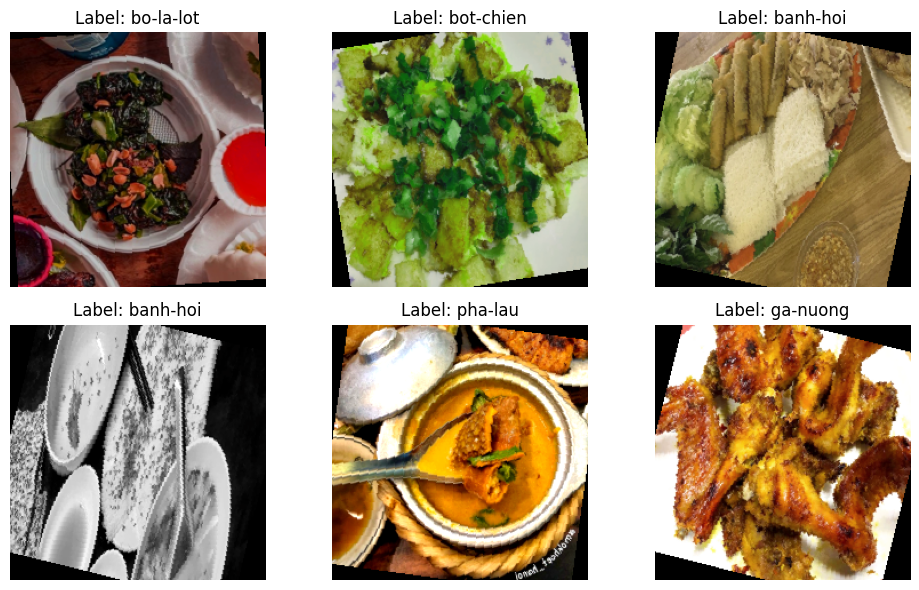

In [26]:
batch = next(iter(train_loader))
images, labels = batch[0], batch[1]

# Giải chuẩn hóa ảnh (đưa về dạng RGB gốc)
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

plt.figure(figsize=(10, 6))
for i in range(6):
    img = images[i] * std + mean   # giải chuẩn hóa đúng cách
    img = img.permute(1, 2, 0).clamp(0, 1)  # chuyển về (H, W, C)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {train_dataset_full.idx2label[labels[i].item()]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Khối Inception cơ bản
class Inception(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()

        self.branch1 = nn.Conv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3red, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(ch3x3red, ch3x3, kernel_size=3, padding=1),
            nn.ReLU(True)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5red, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(ch5x5red, ch5x5, kernel_size=5, padding=2),
            nn.ReLU(True)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool_proj, kernel_size=1),
            nn.ReLU(True)
        )

    def forward(self, x):
        outputs = [
            self.branch1(x),
            self.branch2(x),
            self.branch3(x),
            self.branch4(x)
        ]
        return torch.cat(outputs, 1)


In [35]:
class GoogLeNet(nn.Module):
    def __init__(self, num_classes=21):
        super(GoogLeNet, self).__init__()

        self.pre_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(True),
            nn.MaxPool2d(3, stride=2, ceil_mode=True),
            nn.LocalResponseNorm(5),
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU(True),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(3, stride=2, ceil_mode=True)
        )

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.pre_layers(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [29]:
!pip install torchinfo

import torch
from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GoogLeNet(num_classes=21).to(device)

# In summary
summary(model, input_size=(64, 3, 224, 224))  # batch_size=64, 3 channels, 224x224


Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [64, 21]                  --
├─Sequential: 1-1                        [64, 192, 28, 28]         --
│    └─Conv2d: 2-1                       [64, 64, 112, 112]        9,472
│    └─ReLU: 2-2                         [64, 64, 112, 112]        --
│    └─MaxPool2d: 2-3                    [64, 64, 56, 56]          --
│    └─LocalResponseNorm: 2-4            [64, 64, 56, 56]          --
│    └─Conv2d: 2-5                       [64, 64, 56, 56]          4,160
│    └─ReLU: 2-6                         [64, 64, 56, 56]          --
│    └─Conv2d: 2-7                       [64, 192, 56, 56]         110,784
│    └─ReLU: 2-8                         [64, 192, 56, 56]         --
│    └─LocalResponseNorm: 2-9            [64, 192, 56, 56]         --
│    └─MaxPool2d: 2-10                   [64, 192, 28, 28]         --
├─Inception: 1-2                         [64, 256, 28, 28]         --
│   

Epoch | Train Loss | Train Acc | Train Prec  | Train Rec  | Train F1 | Val Loss | Val Acc  | Val Prec  | Val Rec  | Val F1 
------------------------------------------------------------------------------------------------------------------------


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  1   |   2.9895   |  0.0834   |   0.0271    |   0.0453   |  0.0163  |  2.9802  |  0.0876  |  0.0042   |  0.0476  | 0.0077 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  2   |   2.9820   |  0.0912   |   0.0087    |   0.0490   |  0.0146  |  2.9779  |  0.0876  |  0.0042   |  0.0476  | 0.0077 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^Exception ignored in: ^^^<function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
^^Traceback (most recent call last):
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
^    self._shutdown_workers()
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
^    if w.is_alive():^
   ^    ^^

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  3   |   2.9799   |  0.0901   |   0.0085    |   0.0482   |  0.0142  |  2.9805  |  0.0876  |  0.0042   |  0.0476  | 0.0077 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  4   |   2.9797   |  0.0893   |   0.0084    |   0.0479   |  0.0141  |  2.9797  |  0.0836  |  0.0040   |  0.0476  | 0.0073 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  5   |   3.0054   |  0.0908   |   0.0273    |   0.0482   |  0.0146  |  2.9766  |  0.0836  |  0.0040   |  0.0476  | 0.0073 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  6   |   3.0769   |  0.0846   |   0.0398    |   0.0485   |  0.0255  |  3.0505  |  0.0876  |  0.0042   |  0.0476  | 0.0077 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  7   |   2.9619   |  0.0930   |   0.0500    |   0.0563   |  0.0342  |  2.9327  |  0.0905  |  0.0095   |  0.0546  | 0.0138 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

  8   |   2.9168   |  0.1016   |   0.0770    |   0.0672   |  0.0449  |  2.8991  |  0.1075  |  0.0112   |  0.0681  | 0.0188 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  9   |   2.8814   |  0.1050   |   0.0483    |   0.0679   |  0.0437  |  2.8708  |  0.1164  |  0.0299   |  0.0813  | 0.0429 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 10   |   2.8363   |  0.1209   |   0.0710    |   0.0832   |  0.0607  |  2.8457  |  0.1274  |  0.0656   |  0.0856  | 0.0490 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 11   |   2.7797   |  0.1395   |   0.0963    |   0.1033   |  0.0842  |  2.7837  |  0.1323  |  0.0557   |  0.0903  | 0.0606 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 12   |   2.7411   |  0.1468   |   0.1046    |   0.1121   |  0.0958  |  2.7658  |  0.1174  |  0.0855   |  0.0954  | 0.0632 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 13   |   2.7147   |  0.1610   |   0.1278    |   0.1234   |  0.1063  |  2.6730  |  0.1542  |  0.1234   |  0.1250  | 0.0928 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

 14   |   2.6500   |  0.1801   |   0.1459    |   0.1429   |  0.1278  |  2.5742  |  0.2050  |  0.1598   |  0.1608  | 0.1360 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
    Traceback (most recent 

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 15   |   2.5818   |  0.2049   |   0.1719    |   0.1669   |  0.1531  |  2.5597  |  0.2010  |  0.2001   |  0.1575  | 0.1403 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 16   |   2.5506   |  0.2122   |   0.1828    |   0.1730   |  0.1552  |  2.5347  |  0.2368  |  0.2218   |  0.1917  | 0.1652 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 17   |   2.4967   |  0.2267   |   0.2166    |   0.1889   |  0.1751  |  2.5197  |  0.2249  |  0.2456   |  0.1763  | 0.1578 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 18   |   2.4506   |  0.2406   |   0.2141    |   0.2043   |  0.1932  |  2.5648  |  0.2209  |  0.2412   |  0.1772  | 0.1580 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 19   |   2.4150   |  0.2599   |   0.2462    |   0.2251   |  0.2155  |  2.3787  |  0.2876  |  0.2318   |  0.2451  | 0.2213 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240> 
Traceback (most recent call last):
    File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
      self._shutdown_workers()
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
      if w.is_alive():
    ^^  ^ ^ ^^^ ^^^^^^^^^^^^^^^^^^

 20   |   2.3678   |  0.2687   |   0.2530    |   0.2352   |  0.2246  |  2.5331  |  0.2388  |  0.2486   |  0.1963  | 0.1708 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 21   |   2.3294   |  0.2770   |   0.2679    |   0.2451   |  0.2361  |  2.3113  |  0.2796  |  0.2622   |  0.2519  | 0.2409 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 22   |   2.2678   |  0.3000   |   0.2826    |   0.2675   |  0.2591  |  2.2705  |  0.3154  |  0.3657   |  0.2645  | 0.2669 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 23   |   2.2529   |  0.3030   |   0.2860    |   0.2727   |  0.2639  |  2.2802  |  0.3045  |  0.3597   |  0.2642  | 0.2664 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 24   |   2.2119   |  0.3046   |   0.2833    |   0.2727   |  0.2644  |  2.1810  |  0.3353  |  0.3652   |  0.2970  | 0.2926 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 25   |   2.1747   |  0.3201   |   0.2976    |   0.2868   |  0.2784  |  2.1695  |  0.3393  |  0.2997   |  0.3048  | 0.2885 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

 26   |   2.1416   |  0.3300   |   0.3190    |   0.2992   |  0.2928  |  2.2341  |  0.3303  |  0.3641   |  0.2937  | 0.2723 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 27   |   2.1124   |  0.3307   |   0.3062    |   0.3010   |  0.2942  |  2.1668  |  0.3383  |  0.3965   |  0.2982  | 0.2980 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 28   |   2.0715   |  0.3500   |   0.3401    |   0.3208   |  0.3170  |  2.0713  |  0.3493  |  0.3415   |  0.3153  | 0.3136 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 29   |   2.0309   |  0.3629   |   0.3426    |   0.3312   |  0.3262  |  2.1001  |  0.3542  |  0.3673   |  0.3168  | 0.2998 


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

 30   |   2.0036   |  0.3726   |   0.3562    |   0.3425   |  0.3389  |  2.0623  |  0.3433  |  0.3775   |  0.3026  | 0.3102 

Best epoch: 30, Best Val Loss: 2.0623
Validation Metrics at Best Epoch: Accuracy=0.3433, Precision=0.3775, Recall=0.3026, F1=0.3102


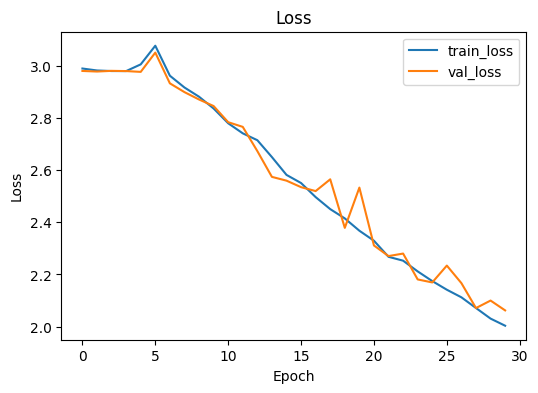

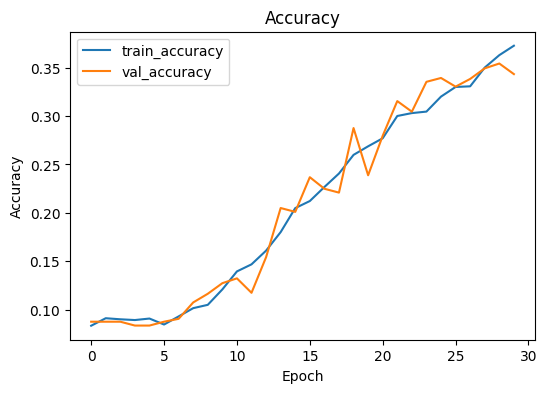

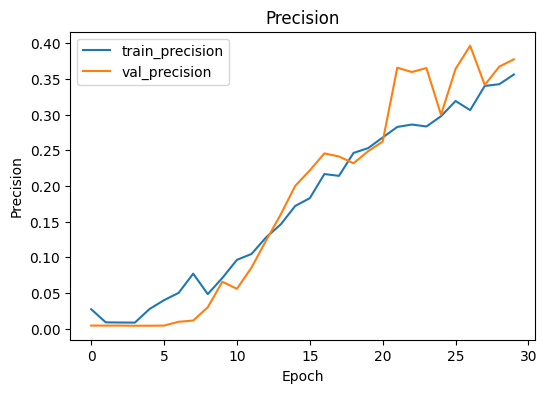

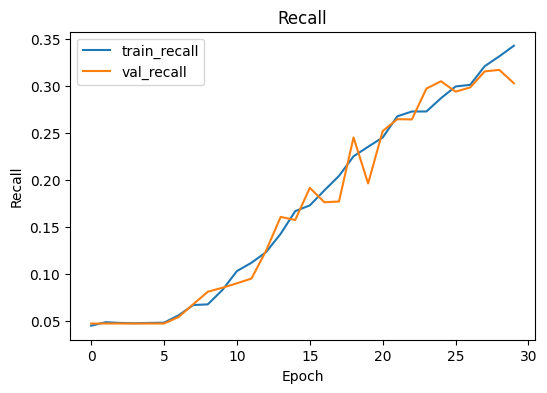

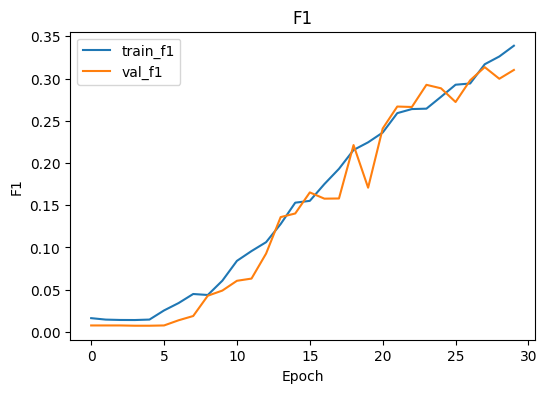

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def compute_metrics(trues, preds):
    return {
        "accuracy": accuracy_score(trues, preds),
        "f1": f1_score(trues, preds, average="macro"),
        "precision": precision_score(trues, preds, average="macro"),
        "recall": recall_score(trues, preds, average="macro")
    }

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for batch in tqdm(dataloader, desc="Training", leave=False):
        images = batch[0].to(device)
        labels = batch[1].to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            images = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def train_model(model, train_loader, val_loader, device, num_epochs=30, lr=0.0005):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    best_epoch = 0
    best_metrics = None

    # For plotting
    history = {"train_loss":[], "val_loss":[],
               "train_accuracy":[], "val_accuracy":[],
               "train_precision":[], "val_precision":[],
               "train_recall":[], "val_recall":[],
               "train_f1":[], "val_f1":[]}

    print(f"{'Epoch':^5} | {'Train Loss':^10} | {'Train Acc':^9} | {'Train Prec':^11} | {'Train Rec':^10} | {'Train F1':^8} | "
          f"{'Val Loss':^8} | {'Val Acc':^8} | {'Val Prec':^9} | {'Val Rec':^8} | {'Val F1':^7}")
    print("-"*120)

    for epoch in range(num_epochs):
        train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_metrics = evaluate(model, val_loader, criterion, device)

        # Save history
        history["train_loss"].append(train_metrics["loss"])
        history["val_loss"].append(val_metrics["loss"])
        history["train_accuracy"].append(train_metrics["accuracy"])
        history["val_accuracy"].append(val_metrics["accuracy"])
        history["train_precision"].append(train_metrics["precision"])
        history["val_precision"].append(val_metrics["precision"])
        history["train_recall"].append(train_metrics["recall"])
        history["val_recall"].append(val_metrics["recall"])
        history["train_f1"].append(train_metrics["f1"])
        history["val_f1"].append(val_metrics["f1"])

        # Check best val_loss
        if val_metrics["loss"] < best_val_loss:
            best_val_loss = val_metrics["loss"]
            best_epoch = epoch + 1
            best_metrics = val_metrics.copy()
            torch.save(model.state_dict(), "best_googlenet.pth")

        # Print table
        print(f"{epoch+1:^5} | "
              f"{train_metrics['loss']:^10.4f} | {train_metrics['accuracy']:^9.4f} | {train_metrics['precision']:^11.4f} | "
              f"{train_metrics['recall']:^10.4f} | {train_metrics['f1']:^8.4f} | "
              f"{val_metrics['loss']:^8.4f} | {val_metrics['accuracy']:^8.4f} | {val_metrics['precision']:^9.4f} | "
              f"{val_metrics['recall']:^8.4f} | {val_metrics['f1']:^7.4f}")

    print(f"\nBest epoch: {best_epoch}, Best Val Loss: {best_val_loss:.4f}")
    print(f"Validation Metrics at Best Epoch: Accuracy={best_metrics['accuracy']:.4f}, "
          f"Precision={best_metrics['precision']:.4f}, Recall={best_metrics['recall']:.4f}, F1={best_metrics['f1']:.4f}")
    # Load best model
    model.load_state_dict(torch.load("best_googlenet.pth"))
    return model, history

#Plotting metrics
def plot_metrics(history):
    metrics = ["loss", "accuracy", "precision", "recall", "f1"]
    for m in metrics:
        plt.figure(figsize=(6,4))
        plt.plot(history[f"train_{m}"], label=f"train_{m}")
        plt.plot(history[f"val_{m}"], label=f"val_{m}")
        plt.title(m.capitalize())
        plt.xlabel("Epoch")
        plt.ylabel(m.capitalize())
        plt.legend()
        plt.show()

#Run training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GoogLeNet(num_classes=len(train_dataset_full.label2idx))
trained_model, history = train_model(model, train_loader, val_loader, device, num_epochs=30, lr=1e-3)

# Plot metrics
plot_metrics(history)


##BÀI 3:Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer).


In [40]:
import torch
import torch.nn as nn

class ResnetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = nn.Identity()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        out = self.relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=21, in_channels=3):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.layer1 = self._make_layer(64, 64, blocks=2, stride=1)
        self.layer2 = self._make_layer(64, 128, blocks=2, stride=2)
        self.layer3 = self._make_layer(128, 256, blocks=2, stride=2)
        self.layer4 = self._make_layer(256, 512, blocks=2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = []
        layers.append(ResnetBlock(in_channels, out_channels, stride=stride))
        for _ in range(1, blocks):
            layers.append(ResnetBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18(num_classes=len(train_dataset_full.label2idx)).to(device)
print(model)


ResNet18(
  (stem): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): ResnetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Identity()
    )
    (1): ResnetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def compute_metrics(trues, preds):
    return {
        "accuracy": accuracy_score(trues, preds),
        "f1": f1_score(trues, preds, average="macro", zero_division=0),
        "precision": precision_score(trues, preds, average="macro", zero_division=0),
        "recall": recall_score(trues, preds, average="macro", zero_division=0)
    }

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for images, labels in tqdm(dataloader, desc="Training", leave=False):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0
    all_preds, all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating", leave=False):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def train_model(model, train_loader, device, num_epochs=7, lr=0.0005):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device)

        print(f"Epoch {epoch+1}")
        print(f"Train Loss: {train_metrics['loss']:.4f} | "
              f"accuracy: {train_metrics['accuracy']:.4f} | "
              f"f1: {train_metrics['f1']:.4f} | "
              f"precision: {train_metrics['precision']:.4f} | "
              f"recall: {train_metrics['recall']:.4f} | \n")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18(num_classes=len(train_dataset_full.label2idx)).to(device)

train_model(model, train_loader, device, num_epochs=7, lr=0.0005)


Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1
Train Loss: 2.6755 | accuracy: 0.1862 | f1: 0.1446 | precision: 0.1596 | recall: 0.1547 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2
Train Loss: 2.4121 | accuracy: 0.2609 | f1: 0.2150 | precision: 0.2322 | recall: 0.2274 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 3
Train Loss: 2.2422 | accuracy: 0.3076 | f1: 0.2631 | precision: 0.2765 | recall: 0.2734 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packa

Epoch 4
Train Loss: 2.0923 | accuracy: 0.3508 | f1: 0.3184 | precision: 0.3436 | recall: 0.3211 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 5
Train Loss: 1.9444 | accuracy: 0.3899 | f1: 0.3560 | precision: 0.3712 | recall: 0.3594 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78fef67ff240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 6
Train Loss: 1.8336 | accuracy: 0.4295 | f1: 0.3947 | precision: 0.4105 | recall: 0.3977 | 



Training:   0%|          | 0/142 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7
Train Loss: 1.7292 | accuracy: 0.4522 | f1: 0.4233 | precision: 0.4351 | recall: 0.4248 | 



##BÀI 4:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from transformers import ResNetForImageClassification

def compute_metrics(trues, preds):
    return {
        "accuracy": accuracy_score(trues, preds),
        "f1": f1_score(trues, preds, average="macro", zero_division=0),
        "precision": precision_score(trues, preds, average="macro", zero_division=0),
        "recall": recall_score(trues, preds, average="macro", zero_division=0)
    }

class PretrainedResnet(nn.Module):
    def __init__(self, num_classes=21):
        super().__init__()
        basemodel = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
        self.resnet = basemodel.resnet
        self.classifier = nn.Linear(in_features=2048, out_features=num_classes, bias=True)

    def forward(self, images: torch.Tensor):
        features = self.resnet(images).pooler_output
        features = features.squeeze(-1).squeeze(-1)
        logits = self.classifier(features)
        return logits

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for batch in tqdm(dataloader, desc="Training", leave=False):
        images = batch[0].to(device)   # batch[0] = images
        labels = batch[1].to(device)   # batch[1] = labels

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            images = batch[0].to(device)
            labels = batch[1].to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    metrics = compute_metrics(all_labels, all_preds)
    metrics["loss"] = avg_loss
    return metrics

def train_model(model, train_loader, val_loader, device, num_epochs=1, lr=1e-4):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # History for plotting
    history = {"train_loss":[], "val_loss":[],
               "train_acc":[], "val_acc":[],
               "train_precision":[], "val_precision":[],
               "train_recall":[], "val_recall":[],
               "train_f1":[], "val_f1":[]}

    print(f"{'Epoch':^5} | {'Train Loss':^10} | {'Train Acc':^9} | {'Train Prec':^11} | {'Train Rec':^10} | {'Train F1':^8} | "
          f"{'Val Loss':^8} | {'Val Acc':^8} | {'Val Prec':^9} | {'Val Rec':^8} | {'Val F1':^7}")
    print("-"*120)

    for epoch in range(num_epochs):
        train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_metrics = evaluate(model, val_loader, criterion, device)

        # Save history
        for key in history.keys():
            if key.startswith("train_"):
                history[key].append(train_metrics[key.replace("train_", "")])
            else:
                history[key].append(val_metrics[key.replace("val_", "")])

        # Print epoch metrics
        print(f"{epoch+1:^5} | "
              f"{train_metrics['loss']:^10.4f} | {train_metrics['accuracy']:^9.4f} | {train_metrics['precision']:^11.4f} | "
              f"{train_metrics['recall']:^10.4f} | {train_metrics['f1']:^8.4f} | "
              f"{val_metrics['loss']:^8.4f} | {val_metrics['accuracy']:^8.4f} | {val_metrics['precision']:^9.4f} | "
              f"{val_metrics['recall']:^8.4f} | {val_metrics['f1']:^7.4f}")

    return model, history

def plot_metrics(history):
    metrics = ["loss", "accuracy", "precision", "recall", "f1"]
    for m in metrics:
        plt.figure(figsize=(6,4))
        plt.plot(history[f"train_{m}"], label=f"train_{m}")
        plt.plot(history[f"val_{m}"], label=f"val_{m}")
        plt.title(m.capitalize())
        plt.xlabel("Epoch")
        plt.ylabel(m.capitalize())
        plt.legend()
        plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PretrainedResnet(num_classes=len(train_dataset_full.label2idx)).to(device)

trained_model, history = train_model(model, train_loader, val_loader, device, num_epochs= 1, lr=1e-4)
plot_metrics(history)


Epoch | Train Loss | Train Acc | Train Prec  | Train Rec  | Train F1 | Val Loss | Val Acc  | Val Prec  | Val Rec  | Val F1 
------------------------------------------------------------------------------------------------------------------------


Training:   0%|          | 0/142 [00:00<?, ?it/s]